<a href="https://colab.research.google.com/github/JingfengSteven/NAM_Model_Monotonicity/blob/Model/%E2%80%9CModel_training(pair%2Bsingle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JingfengSteven/givemesomecredit

Cloning into 'givemesomecredit'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 4.40 MiB | 5.61 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
from givemesomecredit import models as nam_models
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn

##Data reading

In [3]:
orgdata=pd.read_csv("givemesomecredit/cs-training.csv")
orgdata=orgdata.dropna(axis=0)
orgdata.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data=orgdata

In [5]:
x=data.iloc[:,2:data.shape[1]]
y=data.iloc[:,1]
x.insert(data.shape[1]-2, 'label', y)
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,label
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


In [6]:
x=np.array(x)
x.shape

(120269, 11)

##Data cleaning

In [7]:
x[:,[0,2]]=x[:,[2,0]]
x[:,[1,8]]=x[:,[8,1]]
x[:,[2,6]]=x[:,[6,2]]
x[:,[3,4]]=x[:,[4,3]]
x[:,[4,9]]=x[:,[9,4]]

In [8]:
x1=x

##First three feature are 3-pairwise, the last two feature are single

In [9]:
x1 = np.delete(x1, np.where
    (x1[:,0] >= 20), axis=0)
x1 = np.delete(x1, np.where
    (x1[:,1] >= 20), axis=0)
x1 = np.delete(x1, np.where
    (x1[:,2] >= 20), axis=0)

In [10]:
x1.shape

(120121, 11)

In [11]:
x1[:,0][x1[:,0]>=4]=4
x1[:,1][x1[:,1]>=4]=4
x1[:,2][x1[:,2]>=4]=4

In [12]:
x1[:,3][(x1[:,3]>=0)&(x1[:,3]<2500)]=5
x1[:,3][(x1[:,3]>=2500)&(x1[:,3]<5000)]=4
x1[:,3][(x1[:,3]>=5000)&(x1[:,3]<7500)]=3
x1[:,3][(x1[:,3]>=7500)&(x1[:,3]<10000)]=2
x1[:,3][(x1[:,3]>=10000)&(x1[:,3]<50000)]=1
x1[:,3][x1[:,3]>=50000]=0

In [13]:
x1[:,4][x1[:,4]>=5]=5

In [14]:
X=x1[:,0:len(x1[0])-1]
Y=x1[:,-1]

##Build the model

In [15]:
tf.compat.v1.reset_default_graph()
#the change of the structure of NAM is in kwargs)
#in this demo, first three feature are strong monotonicity, thereby, they are combined in a DNN.
Number_of_DNN=8
Number_of_Unit=0
Trainable=True
Use_Shallow=False
Model=nam_models.NAM(Number_of_DNN,Number_of_Unit,Trainable,Use_Shallow,feature_dropout = 0.0,dropout = 0.0,kwargs=[3,1,1,1,1,1,1,1])
Model(X)

<tf.Tensor: shape=(120121,), dtype=float32, numpy=
array([0.3181363 , 0.20958912, 0.18581544, ..., 0.2728478 , 0.21388938,
       0.2256822 ], dtype=float32)>

In [16]:
Model.summary()

Model: "nam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_nn (FeatureNN)      multiple                  21        
                                                                 
 feature_nn_1 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_2 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_3 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_4 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_5 (FeatureNN)    multiple                  13        
                                                                 
 feature_nn_6 (FeatureNN)    multiple                  13      

##Single monotonicity

In [17]:
def descretize_single(monotonic_feature,lower_bound,upper_bound,spli,X):
  individual_output=[]
  bar=np.zeros(len(monotonic_feature))
  for i in range(len(monotonic_feature)):
    individual_output.append(np.linspace(lower_bound[i], upper_bound[i], num=spli[i]))
  return individual_output
X=X
monotonic_feature=[3,4]
lower_bound=[0,0]
upper_bound=[5,5]
spli=[6,6]
individual_output=descretize_single(monotonic_feature,lower_bound,upper_bound,spli,X)

In [18]:
individual_output

[array([0., 1., 2., 3., 4., 5.]), array([0., 1., 2., 3., 4., 5.])]

##3-strong-pair monotonicity

In [19]:
def descretize_3_pair():
  lower_bound=0
  upper_bound=4
  pair=[]
  pair1=[]
  pair2=[]
  pair3=[]
  for i in range(5):
    for j in range(5):
      for k in range(5):
        pair.append([i,j,k])
        pair1.append([i,j+1,k-1])
        pair2.append([i+1,j-1,k])
        pair3.append([i-1,j,k])
  return pair,pair1,pair2,pair3

In [20]:
#f(pair) is smaller than f(pair1),f(pair2),f(pair3)
pair,pair1,pair2,pair3=descretize_3_pair()

## Single monotonicity in that 3-strong-pair monotonicity

In [21]:
def descretize_3_pair_single():
  pair_s=[]
  pair_s1=[]
  for i in range(5):
    for j in range(5):
      for k in range(4):
        pair_s.append([k+1,i,j])
        pair_s1.append([k,i,j])

  for i in range(5):
    for j in range(5):
      for k in range(4):
        pair_s.append([i,k+1,j])
        pair_s1.append([i,k,j])

  for i in range(5):
    for j in range(5):
      for k in range(4):
        pair_s.append([i,j,k+1])
        pair_s1.append([i,j,k])
  return pair_s, pair_s1

In [22]:
#f(pair_s) is smaller than f(pair_s1)
pair_s, pair_s1=descretize_3_pair_single()

##Pre_training

In [46]:
Model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics='AUC')

training_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience = 5, factor = 0.1, min_lr = 0.001, verbose = 1),
    tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True),
]

Model.fit(X, Y, batch_size=64, epochs=10)

Epoch 1/10
1877/1877 [==============================] - 12s 4ms/step - loss: 0.1885 - auc: 0.8495
Epoch 2/10
1877/1877 [==============================] - 7s 4ms/step - loss: 0.1885 - auc: 0.8496
Epoch 3/10
1877/1877 [==============================] - 7s 4ms/step - loss: 0.1883 - auc: 0.8500
Epoch 4/10
1877/1877 [==============================] - 6s 3ms/step - loss: 0.1884 - auc: 0.8502
Epoch 5/10
1877/1877 [==============================] - 7s 4ms/step - loss: 0.1883 - auc: 0.8504
Epoch 6/10
1877/1877 [==============================] - 6s 3ms/step - loss: 0.1882 - auc: 0.8501
Epoch 7/10
1877/1877 [==============================] - 8s 4ms/step - loss: 0.1882 - auc: 0.8504
Epoch 8/10
1877/1877 [==============================] - 7s 3ms/step - loss: 0.1882 - auc: 0.8504
Epoch 9/10
1877/1877 [==============================] - 8s 4ms/step - loss: 0.1882 - auc: 0.8504
Epoch 10/10
1877/1877 [==============================] - 7s 4ms/step - loss: 0.1882 - auc: 0.8504


## Training to satisfy the monotonicity requirement. Once first 3 loss reach to 0, decreas the learning_r

In [48]:
each_epoch=20
alpha_1=1
alpha_2=1
alpha_3=1
learning_r=0.01

for i in range(each_epoch):
  Model.network_learn(X,Y,monotonic_feature,individual_output,alpha_1,pair,pair1,pair2,pair3,alpha_2,pair_s,pair_s1,alpha_3,learning_r)
  print("------------")

loss of single monotonicity tf.Tensor([0.], shape=(1,), dtype=float32)
loss of strong pairwise monotonicity tf.Tensor([0.01606154], shape=(1,), dtype=float32)
loss of single monotonicity in strong pairwise monotonicity 0
overall loss tf.Tensor([0.20430464], shape=(1,), dtype=float32)
------------
loss of single monotonicity tf.Tensor([0.], shape=(1,), dtype=float32)
loss of strong pairwise monotonicity tf.Tensor([0.01236796], shape=(1,), dtype=float32)
loss of single monotonicity in strong pairwise monotonicity 0
overall loss tf.Tensor([0.2041224], shape=(1,), dtype=float32)
------------
loss of single monotonicity tf.Tensor([0.], shape=(1,), dtype=float32)
loss of strong pairwise monotonicity tf.Tensor([0.00898266], shape=(1,), dtype=float32)
loss of single monotonicity in strong pairwise monotonicity 0
overall loss tf.Tensor([0.19716465], shape=(1,), dtype=float32)
------------
loss of single monotonicity tf.Tensor([0.], shape=(1,), dtype=float32)
loss of strong pairwise monotonicity

##Once training is complete, save the model

In [49]:
Model.save_weights('./Model/My_model_1')

##Visulization

###single monotonicity (feature 3,4)

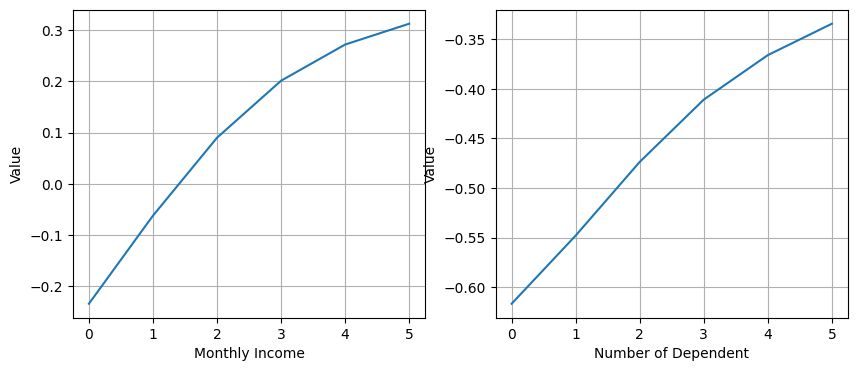

In [50]:
ind=0
visu=[]
for i in range(len(X[0])):
  if(i in monotonic_feature):
    visui=[]
    for j in range(len(individual_output[ind])):
      temp=np.zeros(len(X[0]))
      temp[i]=individual_output[ind][j]
      individual_output_now = Model.calc_outputs([temp], training=True)
      visui.append(individual_output_now[i-2])
    visu.append(visui)
    ind+=1

fig = plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.xlabel('Monthly Income')
plt.ylabel('Value')
plt.plot(visu[0])
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('Number of Dependent')
plt.ylabel('Value')
plt.plot(visu[1])
plt.grid()


###None monotonicity (feature 5,6,7,8,9,10)

In [51]:
def none_descretize_single(monotonic_feature,lower_bound,upper_bound,spli,X):
  none_individual_output=[]
  bar=np.zeros(len(monotonic_feature))
  for i in range(len(monotonic_feature)):
    none_individual_output.append(np.linspace(lower_bound[i], upper_bound[i], num=spli[i]))
  return none_individual_output


none_monotonic_feature=[5,6,7,8,9]
none_lower_bound=[0,0,0,0,0]
none_upper_bound=[10,10,10,10,10]
none_spli=[11,11,11,11,11]
none_individual_output=none_descretize_single(none_monotonic_feature,none_lower_bound,none_upper_bound,none_spli,X)

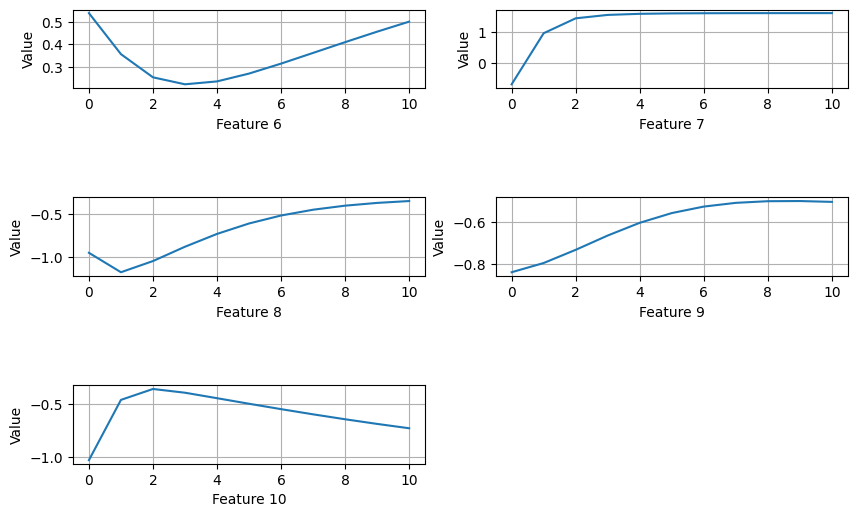

In [52]:
ind=0
visu=[]
for i in range(len(X[0])):
  if(i in none_monotonic_feature):
    visui=[]
    for j in range(len(none_individual_output[ind])):
      temp=np.zeros(len(X[0]))
      temp[i]=none_individual_output[ind][j]
      none_individual_output_now = Model.calc_outputs([temp], training=True)
      visui.append(none_individual_output_now[i-2])
    visu.append(visui)
    ind+=1

fig = plt.figure(figsize=(10,12))
plt.subplot(10, 2, 1)
plt.xlabel('Feature 6')
plt.ylabel('Value')
plt.plot(visu[0])
plt.grid()

plt.subplot(10, 2, 2)
plt.xlabel('Feature 7')
plt.ylabel('Value')
plt.plot(visu[1])
plt.grid()

plt.subplot(10, 2, 5)
plt.xlabel('Feature 8')
plt.ylabel('Value')
plt.plot(visu[2])
plt.grid()

plt.subplot(10, 2, 6)
plt.xlabel('Feature 9')
plt.ylabel('Value')
plt.plot(visu[3])
plt.grid()

plt.subplot(10, 2, 9)
plt.xlabel('Feature 10')
plt.ylabel('Value')
plt.plot(visu[4])
plt.grid()


###Strong pairwise (feature 1,2,3)

###this is an exmaple showing the strong pairwise monotonicity regarding feature_1 and feature_2, the value of feature_3 is arbitarly set as 0,1,2,3,4

<ipython-input-53-008a18453e0e>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(x,y,z, cmap='Blues')


feature 3 is 0
[[-0.62303013  0.55657637  1.23208523  1.66098046  1.93902266]
 [ 0.22022974  1.03024304  1.54577744  1.92776179  2.17695999]
 [ 0.80336678  1.35300028  1.80441892  2.14511347  2.35857916]
 [ 1.11532259  1.57009268  1.98466098  2.287498    2.46861029]
 [ 1.28753543  1.71442938  2.10255957  2.37395334  2.52981949]]


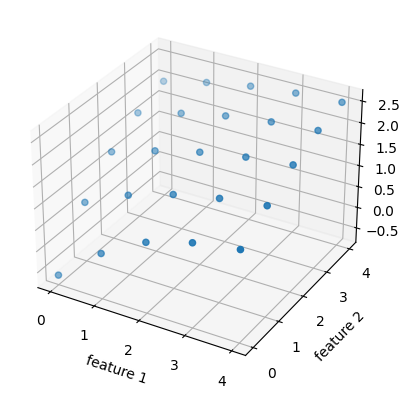

In [53]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = plt.axes(projection='3d')

dx=np.linspace(0,4,5)
dy=np.linspace(0,4,5)
x=[]
y=[]
z=[]
ma=np.zeros((5,5))
temp=np.zeros(len(X[0]))
temp[2]=0
for i in range(5):
  for j in range(5):
    x.append(dx[i])
    y.append(dy[j])
    temp[0]=dx[i]
    temp[1]=dy[j]
    h=Model.calc_outputs([temp], training=True)
    z.append(h[0])
    ma[i][j]=np.array(h[0])
z=np.array(z)
ax1.scatter3D(x,y,z, cmap='Blues')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
print("feature 3 is 0")
print(ma)

<ipython-input-54-83896e973d29>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(x,y,z, cmap='Blues')


feature 3 is 1
[[1.13478911 1.87050474 2.24231768 2.43690729 2.53832388]
 [1.58894181 2.07605171 2.36164474 2.51865625 2.59925699]
 [1.79755962 2.18538284 2.4295435  2.56311607 2.63003922]
 [1.91085231 2.25656796 2.47338343 2.58958101 2.64662218]
 [1.99245536 2.31112814 2.50551844 2.60743904 2.65669775]]


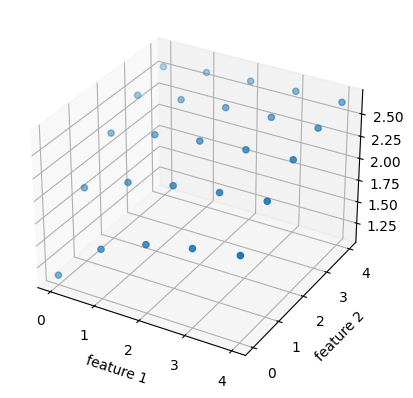

In [54]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = plt.axes(projection='3d')

dx=np.linspace(0,4,5)
dy=np.linspace(0,4,5)
x=[]
y=[]
z=[]
ma=np.zeros((5,5))
temp=np.zeros(len(X[0]))
temp[2]=1
for i in range(5):
  for j in range(5):
    x.append(dx[i])
    y.append(dy[j])
    temp[0]=dx[i]
    temp[1]=dy[j]
    h=Model.calc_outputs([temp], training=True)
    z.append(h[0])
    ma[i][j]=np.array(h[0])
z=np.array(z)
ax1.scatter3D(x,y,z, cmap='Blues')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
print("feature 3 is 1")
print(ma)

<ipython-input-55-9f300e1b6b04>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(x,y,z, cmap='Blues')


feature 3 is 2
[[2.09171963 2.43923807 2.58215523 2.64359236 2.67123175]
 [2.2755127  2.50175428 2.60754585 2.65656948 2.67911625]
 [2.35666656 2.53470945 2.62286472 2.66442728 2.68354607]
 [2.40467548 2.55776405 2.63406086 2.66997194 2.68642187]
 [2.44144201 2.57641268 2.64309406 2.67429543 2.68852711]]


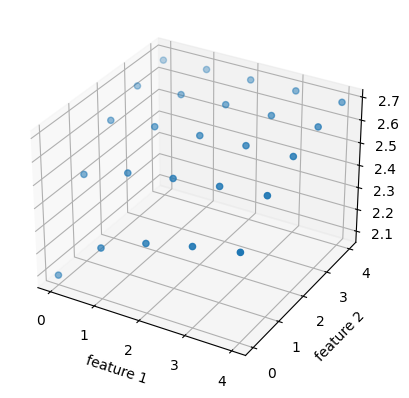

In [55]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = plt.axes(projection='3d')

dx=np.linspace(0,4,5)
dy=np.linspace(0,4,5)
x=[]
y=[]
z=[]
ma=np.zeros((5,5))
temp=np.zeros(len(X[0]))
temp[2]=2
for i in range(5):
  for j in range(5):
    x.append(dx[i])
    y.append(dy[j])
    temp[0]=dx[i]
    temp[1]=dy[j]
    h=Model.calc_outputs([temp], training=True)
    z.append(h[0])
    ma[i][j]=np.array(h[0])
z=np.array(z)
ax1.scatter3D(x,y,z, cmap='Blues')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
print("feature 3 is 2")
print(ma)

<ipython-input-56-ac78cb430594>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(x,y,z, cmap='Blues')


feature 3 is 3
[[2.47895765 2.6191783  2.66752911 2.6860342  2.69374657]
 [2.56029034 2.64121675 2.67443419 2.68872976 2.69502926]
 [2.59161472 2.65170527 2.67852974 2.69052172 2.69588423]
 [2.60871077 2.658741   2.68159866 2.69190836 2.6965313 ]
 [2.62122583 2.66436148 2.68413115 2.69305563 2.69705677]]


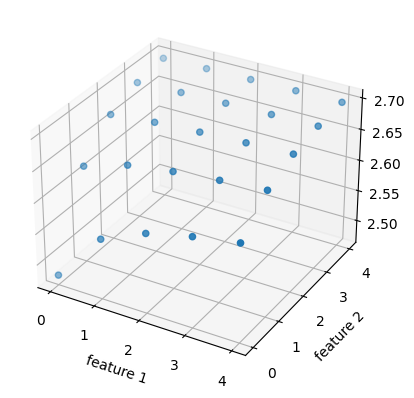

In [56]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = plt.axes(projection='3d')

dx=np.linspace(0,4,5)
dy=np.linspace(0,4,5)
x=[]
y=[]
z=[]
ma=np.zeros((5,5))
temp=np.zeros(len(X[0]))
temp[2]=3
for i in range(5):
  for j in range(5):
    x.append(dx[i])
    y.append(dy[j])
    temp[0]=dx[i]
    temp[1]=dy[j]
    h=Model.calc_outputs([temp], training=True)
    z.append(h[0])
    ma[i][j]=np.array(h[0])
z=np.array(z)
ax1.scatter3D(x,y,z, cmap='Blues')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
print("feature 3 is 3")
print(ma)

feature 3 is 4
[[2.62027836 2.67445183 2.6907177  2.69637299 2.69859219]
 [2.6562686  2.68295622 2.69299316 2.69711256 2.69888306]
 [2.66817856 2.68643856 2.69420242 2.69759274 2.69909143]
 [2.67383146 2.68855238 2.69507074 2.69796848 2.6992588 ]
 [2.67765093 2.69017601 2.69578075 2.69828367 2.69939995]]


<ipython-input-57-a025910b5141>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(x,y,z, cmap='Blues')


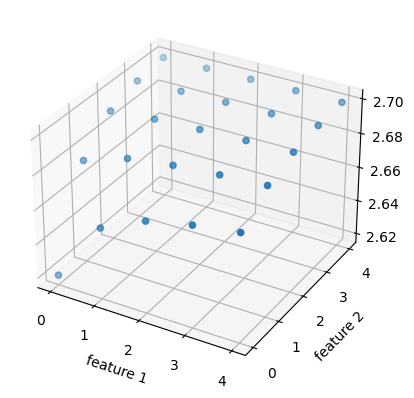

In [57]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = plt.axes(projection='3d')

dx=np.linspace(0,4,5)
dy=np.linspace(0,4,5)
x=[]
y=[]
z=[]
ma=np.zeros((5,5))
temp=np.zeros(len(X[0]))
temp[2]=4
for i in range(5):
  for j in range(5):
    x.append(dx[i])
    y.append(dy[j])
    temp[0]=dx[i]
    temp[1]=dy[j]
    h=Model.calc_outputs([temp], training=True)
    z.append(h[0])
    ma[i][j]=np.array(h[0])
z=np.array(z)
ax1.scatter3D(x,y,z, cmap='Blues')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
print("feature 3 is 4")
print(ma)